# What we did so far:
- created the dataset and the deep learning model
- did some training and estimate our classifier get 92% accuracy.

# Today we are going to explore some very cool comcepts from transfer learning and explore a little bit under the hood of the ResNets

In [1]:
from fastai.vision.all import *

In [2]:
path = Path('./data for classification/')

In [3]:
data = ImageDataLoaders.from_folder(path, valid_pct=.2, batch_tfms=[Normalize.from_stats(*imagenet_stats),*aug_transforms(size=(128,128))])

In [4]:
b = data.one_batch()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<AxesSubplot:>

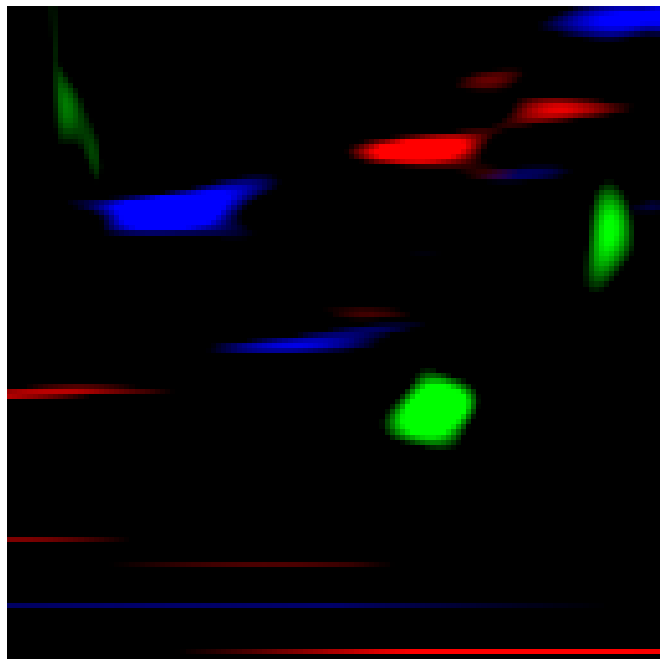

In [5]:
_, axs = subplots(figsize=(12,12))
show_image(b[0][0],ax=axs[0])

In [6]:
b[0][0]

tensor([[[-1.6825, -1.7105, -1.7384,  ..., -0.4511, -0.6615, -0.8634],
         [-1.7136, -1.7244, -1.7367,  ..., -0.6141, -0.8183, -1.0075],
         [-1.7558, -1.7592, -1.7539,  ..., -0.6480, -0.8206, -0.9782],
         ...,
         [-0.0653, -0.0720, -0.0750,  ..., -1.4005, -1.4058, -1.4095],
         [-0.6248, -0.6174, -0.6109,  ...,  0.9812,  0.9640,  0.9579],
         [-1.4101, -1.4087, -1.4047,  ..., -1.5970, -1.6016, -1.6054]],

        [[-1.6528, -1.6299, -1.7154,  ..., -1.6293, -1.5389, -1.3892],
         [-1.6450, -1.6238, -1.7077,  ..., -1.6321, -1.5444, -1.3962],
         [-1.6486, -1.6221, -1.7017,  ..., -1.6472, -1.5490, -1.4171],
         ...,
         [-1.7482, -1.7503, -1.7504,  ..., -1.8909, -1.8911, -1.8931],
         [-1.7160, -1.7253, -1.7272,  ..., -1.8576, -1.8578, -1.8579],
         [-1.5671, -1.5634, -1.5624,  ..., -1.8480, -1.8305, -1.8305]],

        [[-1.5177, -1.5292, -1.5375,  ...,  0.7291,  0.8025,  0.8634],
         [-1.3770, -1.3776, -1.3807,  ...,  1

### To not repeat the same joke, lets try a "different" model using xResNet proposed in https://arxiv.org/pdf/1812.01187.pdf (spoiler: is a resnet with some tricks under the sleeve)

In [9]:
model = xresnet50()
learn = Learner(data, model, loss_func=CrossEntropyLossFlat(), metrics=[accuracy,error_rate])

In [10]:
learn.summary()

XResNet (Input shape: ['64 x 3 x 128 x 128'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 32 x 64 x 64    864        True      
________________________________________________________________
BatchNorm2d          64 x 32 x 64 x 64    64         True      
________________________________________________________________
ReLU                 64 x 32 x 64 x 64    0          False     
________________________________________________________________
Conv2d               64 x 32 x 64 x 64    9,216      True      
________________________________________________________________
BatchNorm2d          64 x 32 x 64 x 64    64         True      
________________________________________________________________
ReLU                 64 x 32 x 64 x 64    0          False     
________________________________________________________________
Conv2d               64 x 64 x 64 x 64    18,432     True      
____________________________________________________

SuggestedLRs(lr_min=0.04365158379077912, lr_steep=0.0002754228771664202)

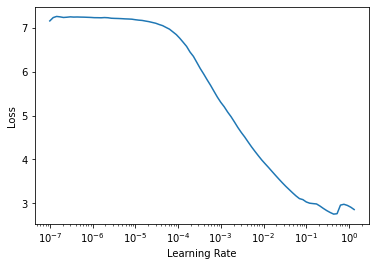

In [11]:
learn.lr_find()

In [12]:
learn.fit_one_cycle(7, 1e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.869159,0.669073,0.643221,0.356779,00:34
1,0.398793,0.302890,0.869521,0.130479,00:34
2,0.315725,0.277198,0.889908,0.110092,00:34
3,0.283000,0.249031,0.901121,0.098879,00:34
4,0.257816,0.241708,0.909276,0.090724,00:34
5,0.240711,0.227232,0.917431,0.082569,00:35
6,0.232407,0.223384,0.918451,0.081549,00:34


In [13]:
learn.save('xresnet50_model')

Path('data for classification/models/xresnet50_model.pth')

### lets check some predictions:

In [14]:
learn.get_preds??

Signature:
learn.get_preds(
    ds_idx=1,
    dl=None,
    with_input=False,
    with_decoded=False,
    with_loss=False,
    act=None,
    inner=False,
    reorder=True,
    cbs=None,
    save_preds=None,
    save_targs=None,
    concat_dim=0,
)
Docstring: Get the predictions and targets on the `ds_idx`-th dbunchset or `dl`, optionally `with_input` and `with_loss`
Source:   
    @delegates(GatherPredsCallback.__init__)
    def get_preds(self, ds_idx=1, dl=None, with_input=False, with_decoded=False, with_loss=False, act=None,
                  inner=False, reorder=True, cbs=None, **kwargs):
        if dl is None: dl = self.dls[ds_idx].new(shuffled=False, drop_last=False)
        if reorder and hasattr(dl, 'get_idxs'):
            idxs = dl.get_idxs()
            dl = dl.new(get_idxs = _ConstantFunc(idxs))
        cb = GatherPredsCallback(with_input=with_input, with_loss=with_loss, **kwargs)
        ctx_mgrs = self.validation_context(cbs=L(cbs)+[cb], inner=inner)
        if with_loss: c

In [15]:
preds = learn.get_preds()

In [16]:
preds

(tensor([[9.5198e-01, 4.7556e-02, 5.4416e-07,  ..., 2.6441e-07, 4.6348e-07,
          3.9908e-07],
         [8.7964e-01, 1.1989e-01, 4.8609e-07,  ..., 2.6723e-07, 4.2971e-07,
          3.0977e-07],
         [3.1236e-01, 6.8706e-01, 7.4740e-07,  ..., 3.3398e-07, 4.2991e-07,
          4.7552e-07],
         ...,
         [3.1911e-06, 9.9999e-01, 8.8461e-09,  ..., 8.2770e-09, 3.6916e-09,
          1.6603e-09],
         [6.1302e-04, 9.9937e-01, 2.2746e-08,  ..., 1.5196e-08, 8.8010e-09,
          8.7814e-09],
         [4.6305e-06, 9.9999e-01, 7.9268e-09,  ..., 8.3745e-09, 3.4638e-09,
          1.5507e-09]]),
 tensor([0, 1, 1,  ..., 1, 1, 1]))

In [17]:
preds[0].shape

torch.Size([1962, 1000])

### the xresnet50 has an output vector of dimension 1000, due to its design to run on the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) dataset, which contains 1000 image categories or "classes", including 90 of the 120 dog breeds classified by the full ImageNet schema.

### so we need to adpt to our case, to do so is quite easy. we just need to pass the argument n_out to the xresnet function:

<img src="./figs/bear_grills.jpg" style="width: 650px;" align="center"/>

In [18]:
del(model)
del(learn)
torch.cuda.empty_cache()

In [19]:
model = xresnet50(n_out=2)
learn = Learner(data, model, loss_func=CrossEntropyLossFlat(), metrics=[accuracy,error_rate])

In [20]:
learn.summary()

XResNet (Input shape: ['64 x 3 x 128 x 128'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 32 x 64 x 64    864        True      
________________________________________________________________
BatchNorm2d          64 x 32 x 64 x 64    64         True      
________________________________________________________________
ReLU                 64 x 32 x 64 x 64    0          False     
________________________________________________________________
Conv2d               64 x 32 x 64 x 64    9,216      True      
________________________________________________________________
BatchNorm2d          64 x 32 x 64 x 64    64         True      
________________________________________________________________
ReLU                 64 x 32 x 64 x 64    0          False     
________________________________________________________________
Conv2d               64 x 64 x 64 x 64    18,432     True      
____________________________________________________

### find a learning rate:

SuggestedLRs(lr_min=0.0009120108559727668, lr_steep=0.00019054606673307717)

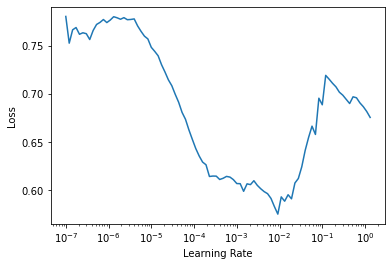

In [21]:
learn.lr_find()

### and fit again:

In [22]:
learn.fit_one_cycle(7,0.00019)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.391988,0.367648,0.837411,0.162589,00:33
1,0.336866,0.284078,0.884811,0.115189,00:34
2,0.314912,0.266448,0.898573,0.101427,00:34
3,0.290895,0.270428,0.889399,0.110601,00:34
4,0.275817,0.267700,0.897554,0.102446,00:33
5,0.261834,0.244250,0.904689,0.095311,00:34
6,0.246919,0.249092,0.902650,0.097350,00:34


### checking the predictions again:

In [23]:
preds = learn.get_preds()

In [24]:
preds

(tensor([[8.3391e-01, 1.6609e-01],
         [5.8713e-01, 4.1287e-01],
         [4.4995e-01, 5.5005e-01],
         ...,
         [9.7602e-05, 9.9990e-01],
         [3.3661e-03, 9.9663e-01],
         [4.0619e-04, 9.9959e-01]]),
 tensor([0, 1, 1,  ..., 1, 1, 1]))

### now we have the correct shape for our predictions.

<img src="./figs/tmykn.gif" style="width: 450px;" align="center"/>

### we can save our model for use later:

In [25]:
learn.save('xresnet50_model')

Path('data for classification/models/xresnet50_model.pth')

# Transfer learning

We can say that Transfer Learning is to use models well trained for a given task into a different problem,  e.g. car image classifier model can also be use to classify trucks. Or another model well trained on ImageNet can be used to classify pulmonary illness.

### Progressive Resizing

### start training using small images, and end training using large images. Spending most of the epochs training with small images, helps training complete much faster.

### Since we trained our model with 128 size, lets start a new model to test the effects of progressive resizing:

In [26]:
del(data)
del(learn)
torch.cuda.empty_cache()

### To implement progressive resizing it is most convenient if you first create a get_dls function which takes an image size and a batch size as we did in the section before, and returns your DataLoaders

In [27]:
def get_dls(bs, size):
    dl = ImageDataLoaders.from_folder(path, valid_pct=.2,bs=bs, batch_tfms=[Normalize.from_stats(*imagenet_stats),*aug_transforms(size=size)])
    return dl

In [28]:
data = get_dls(256,32)

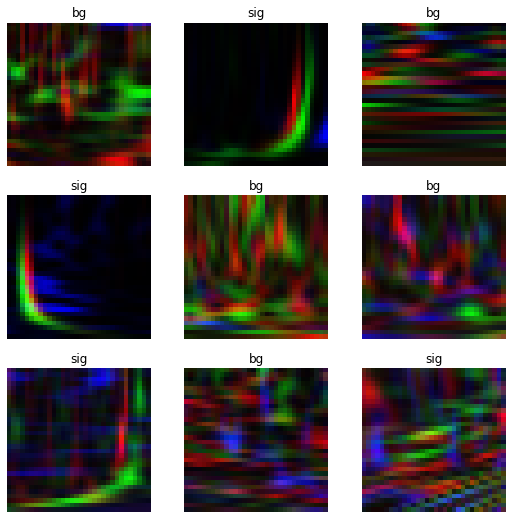

In [29]:
data.show_batch()

In [30]:
model = xresnet50(n_out=2)
learn = Learner(data, model, loss_func=CrossEntropyLossFlat(), metrics=[accuracy,error_rate])

In [31]:
learn.summary()

XResNet (Input shape: ['256 x 3 x 32 x 32'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               256 x 32 x 16 x 16   864        True      
________________________________________________________________
BatchNorm2d          256 x 32 x 16 x 16   64         True      
________________________________________________________________
ReLU                 256 x 32 x 16 x 16   0          False     
________________________________________________________________
Conv2d               256 x 32 x 16 x 16   9,216      True      
________________________________________________________________
BatchNorm2d          256 x 32 x 16 x 16   64         True      
________________________________________________________________
ReLU                 256 x 32 x 16 x 16   0          False     
________________________________________________________________
Conv2d               256 x 64 x 16 x 16   18,432     True      
_____________________________________________________

SuggestedLRs(lr_min=0.0002511886414140463, lr_steep=2.511886486900039e-05)

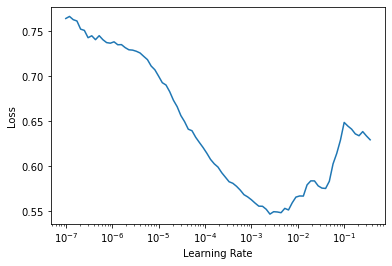

In [32]:
learn.lr_find()

In [33]:
learn.fit_one_cycle(7,2.51e-5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.605655,0.474495,0.750765,0.249235,00:32
1,0.490954,0.394357,0.822630,0.177370,00:16
2,0.437347,0.369263,0.843017,0.156983,00:16
3,0.399498,0.360847,0.847095,0.152905,00:16
4,0.377960,0.348972,0.852192,0.147808,00:15
5,0.361917,0.346547,0.856779,0.143221,00:16
6,0.355157,0.346974,0.855759,0.144241,00:16


In [34]:
learn.save('xresnet50_stage0')

Path('data for classification/models/xresnet50_stage0.pth')

### Lets just define what we will do:
- change the size and batch of the data
- update the model
- find new learning rate
- run the model freezed for n epochs freezed, in this case for 1 epoch
- unfreeze the model and run for more n epochs
- save the model
- repeat.

- change the size and batch of the data

In [36]:
data = get_dls(128,64)

- update the model

In [37]:
learn.dls = data

- find new learning rate

SuggestedLRs(lr_min=5.248074739938602e-06, lr_steep=0.3019951581954956)

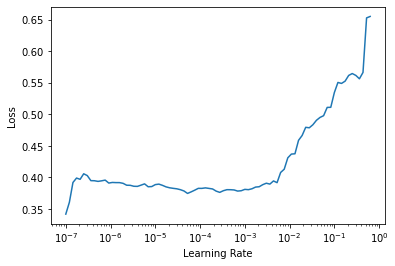

In [38]:
learn.lr_find()

we can use the fine_tune function to makes things more easy.

In [39]:
learn.fine_tune(5, 2e-5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.364480,0.329716,0.863405,0.136595,00:17


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.350355,0.325084,0.866463,0.133537,00:17
1,0.343317,0.317395,0.873598,0.126402,00:17
2,0.336686,0.317727,0.872579,0.127421,00:17
3,0.333577,0.311923,0.879205,0.120795,00:17
4,0.329470,0.312282,0.880734,0.119266,00:17


save the model

In [40]:
learn.save('xresnet50_stage1')

Path('data for classification/models/xresnet50_stage1.pth')

change the data sizes and batches:

In [ ]:
del(data)
torch.cuda.empty_cache()

In [42]:
data = get_dls(64,128)

update our model:

In [43]:
learn.dls = data

find new lr:

SuggestedLRs(lr_min=9.12010818865383e-08, lr_steep=0.005248074419796467)

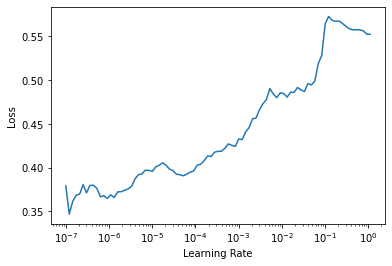

In [44]:
learn.lr_find()

fine tune it:

In [45]:
learn.fine_tune(5, 2e-5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.367659,0.326522,0.863914,0.136086,00:33


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.340332,0.325550,0.866463,0.133537,00:34
1,0.347029,0.321633,0.865443,0.134557,00:34
2,0.336300,0.315456,0.871560,0.128440,00:34
3,0.322542,0.310068,0.871050,0.128950,00:34
4,0.324866,0.309948,0.872069,0.127931,00:34


One more time

In [46]:
del(data)
torch.cuda.empty_cache()

In [47]:
data = get_dls(32,256)

In [48]:
learn.dls = data

SuggestedLRs(lr_min=5.248074739938602e-06, lr_steep=0.5248074531555176)

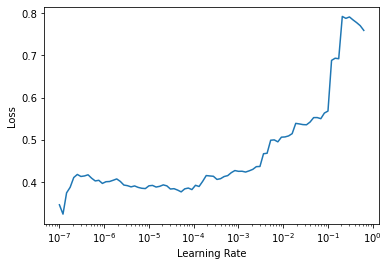

In [49]:
learn.lr_find()

In [50]:
learn.fine_tune(5,1.32e-5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.363673,0.345940,0.859327,0.140673,01:48


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.356097,0.347518,0.855759,0.144241,01:48
1,0.347808,0.339910,0.859837,0.140163,01:48
2,0.336253,0.335464,0.862895,0.137105,01:48
3,0.321039,0.333350,0.861876,0.138124,01:48
4,0.340051,0.332594,0.863405,0.136595,01:48


In [51]:
learn.save('xresnet_50_final')

Path('data for classification/models/xresnet_50_final.pth')

Now lets test on the wild!!

In [52]:
path_real_data = Path('real_signals/')

In [53]:
real_files = get_image_files(path_real_data)

In [54]:
pred, clt, probs = learn.predict(real_files[0])

In [55]:
for i in real_files:
    pred, _, probs = learn.predict(i)
    print(f'{i.name}: class predicted {pred}')

GW151226_R1.png: class predicted sig


GW190425_R1.png: class predicted sig


GW151012_R1.png: class predicted bg


MC170412_R1.png: class predicted bg


MC170616_R1.png: class predicted bg


GW190814_R1.png: class predicted sig


MC170219_R1.png: class predicted bg


GW170818_R1.png: class predicted sig


MC170720_R1.png: class predicted bg


MC151008_R1.png: class predicted bg


MC170630_R1.png: class predicted sig


GW170817_R1.png: class predicted sig


MC161202_R1.png: class predicted sig


GW170729_R1.png: class predicted sig


MC170705_R1.png: class predicted bg


GW170814_R1.png: class predicted sig


GW190412_R2.png: class predicted sig


MC170208_R1.png: class predicted bg


MC170405_R1.png: class predicted bg


GW170104_R1.png: class predicted sig


MC161217_R1.png: class predicted sig


GW170608_R1.png: class predicted sig


MC151116_R1.png: class predicted bg


MC151012A_R1.png: class predicted bg


GW170823_R1.png: class predicted sig


MC170423_R1.png: class predicted bg


GW150914_R1.png: class predicted sig


GW170809_R1.png: class predicted sig


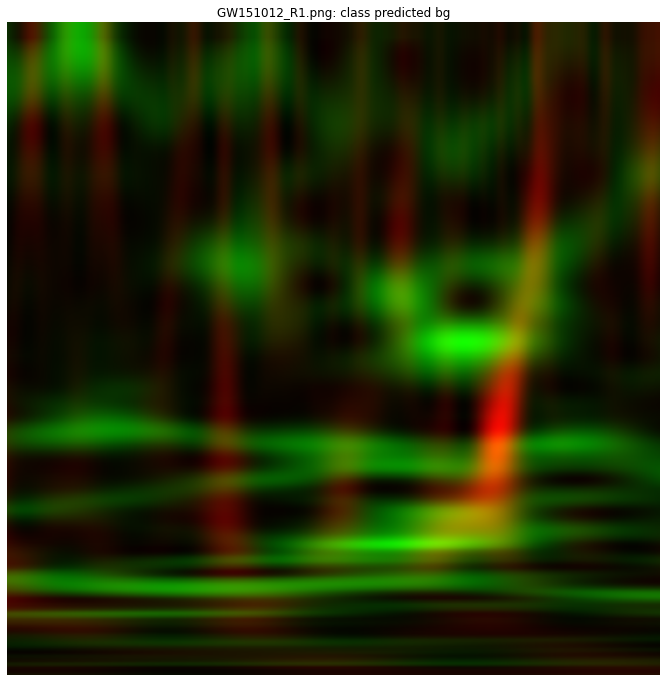

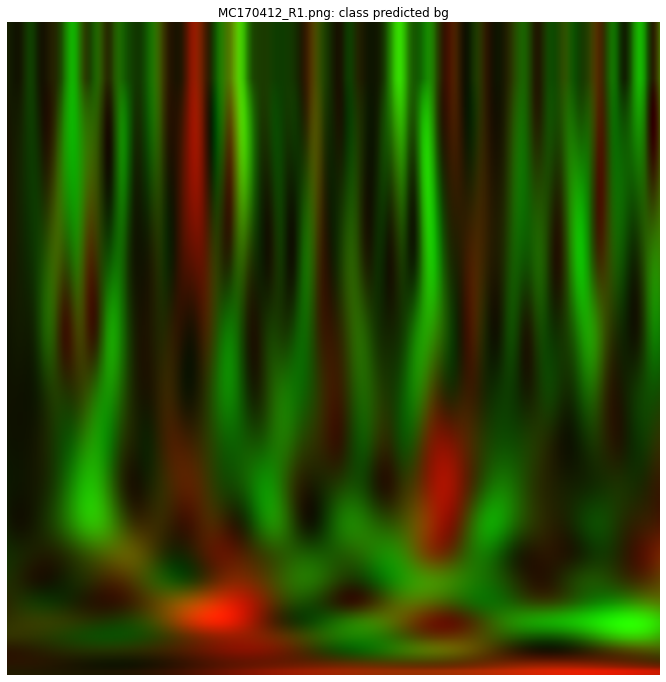

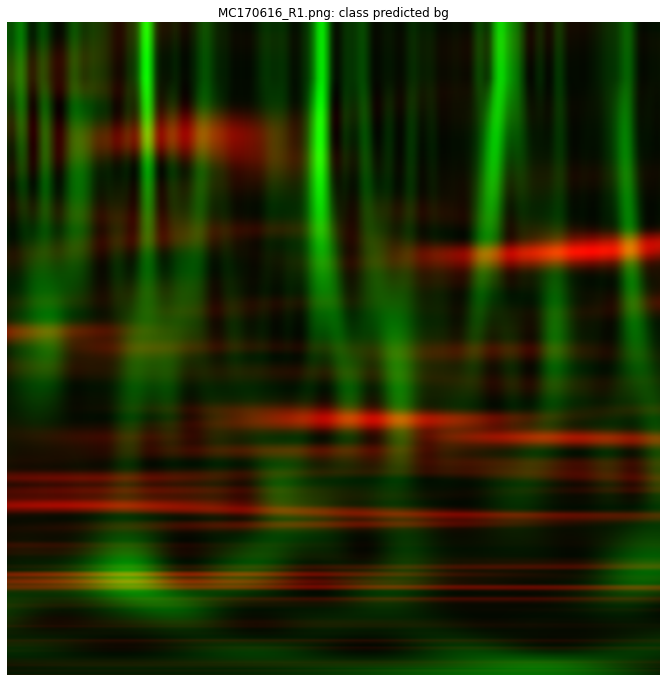

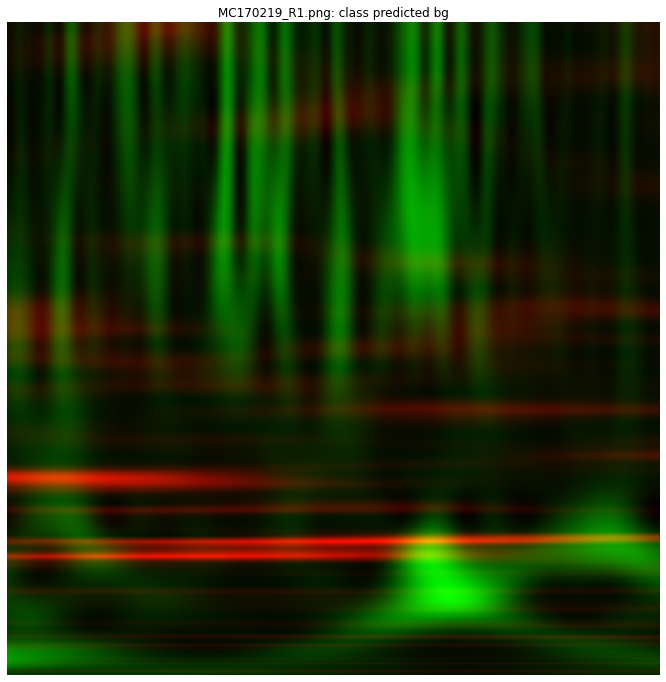

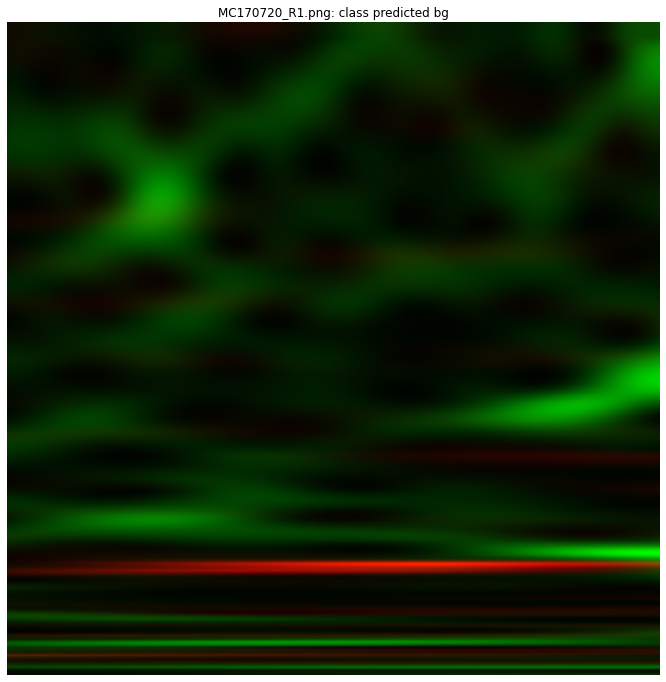

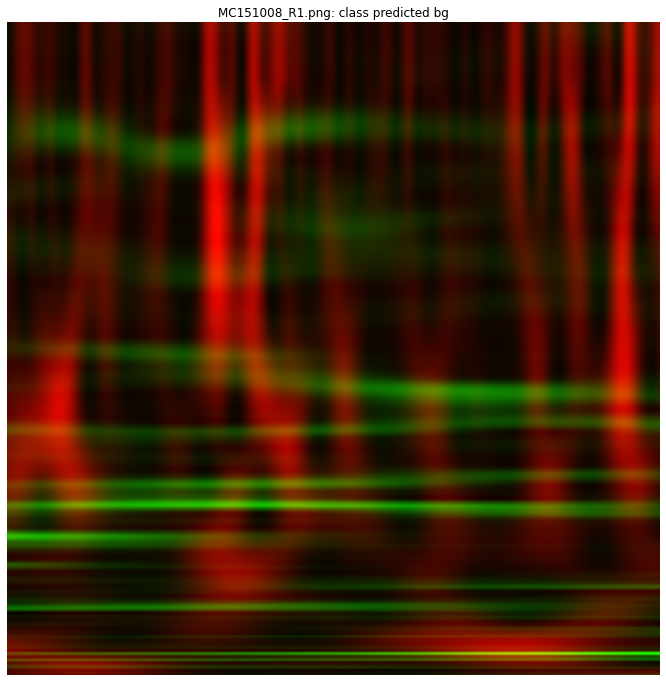

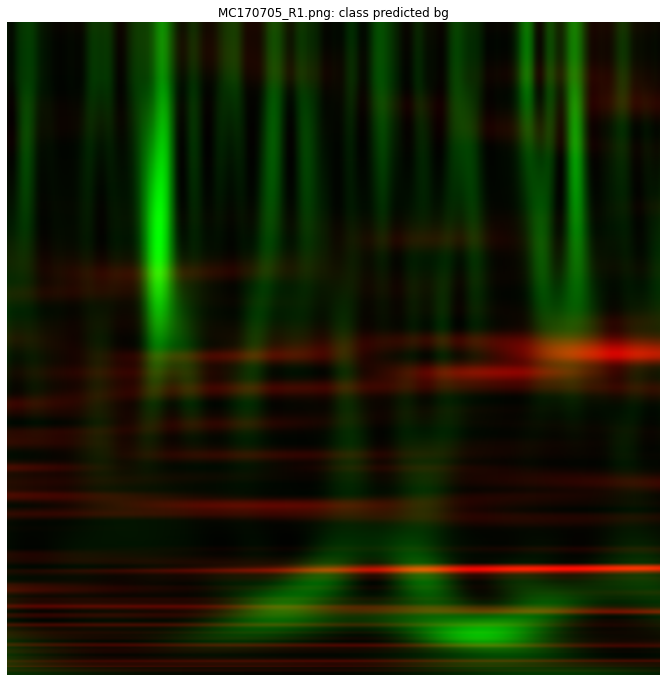

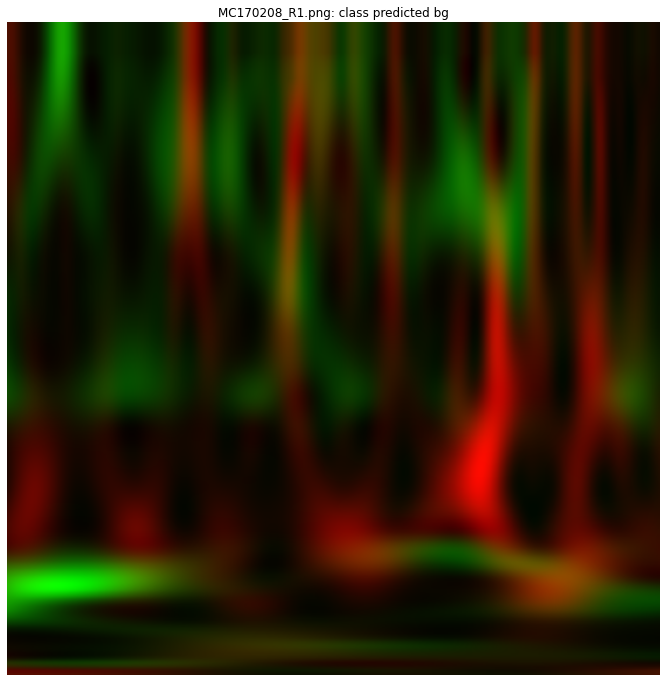

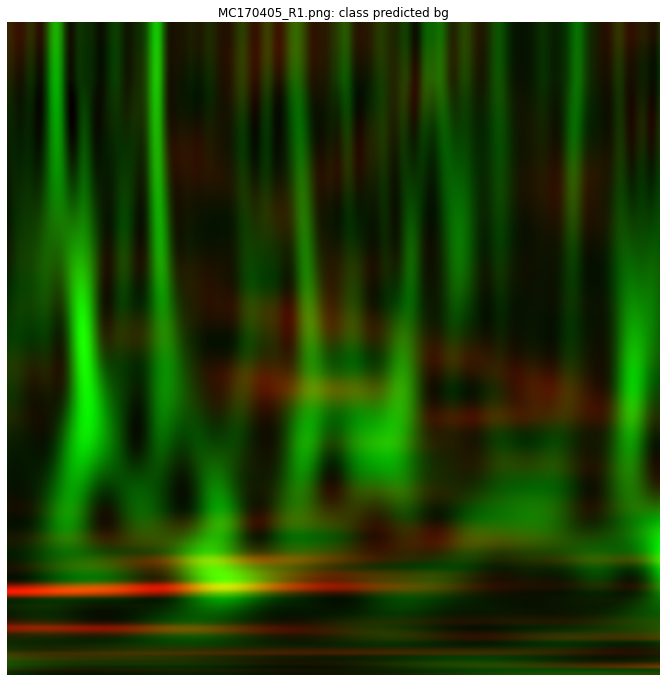

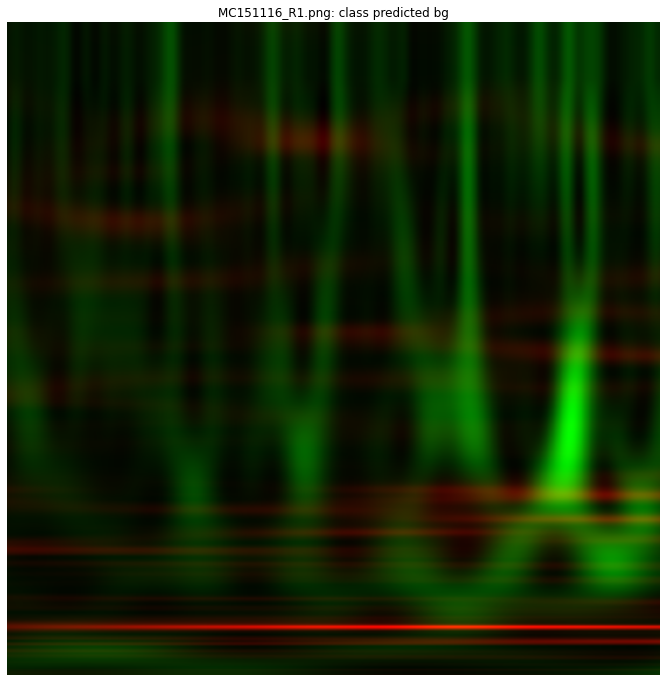

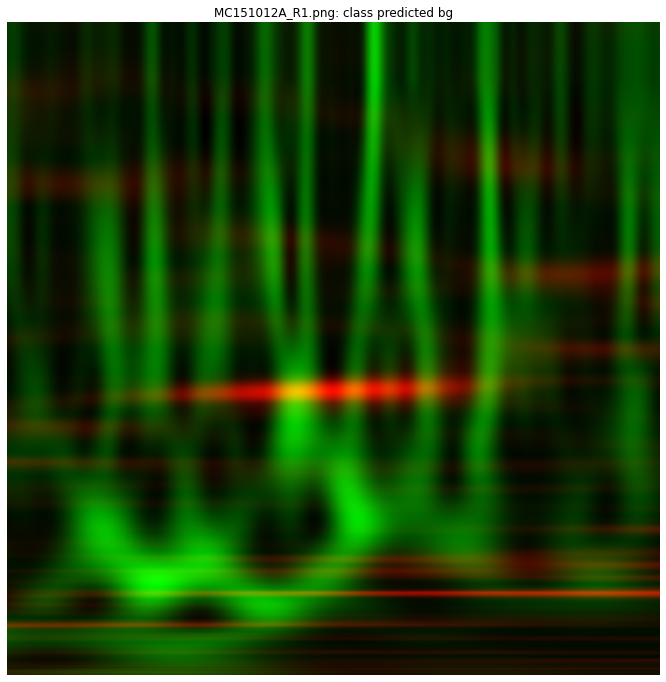

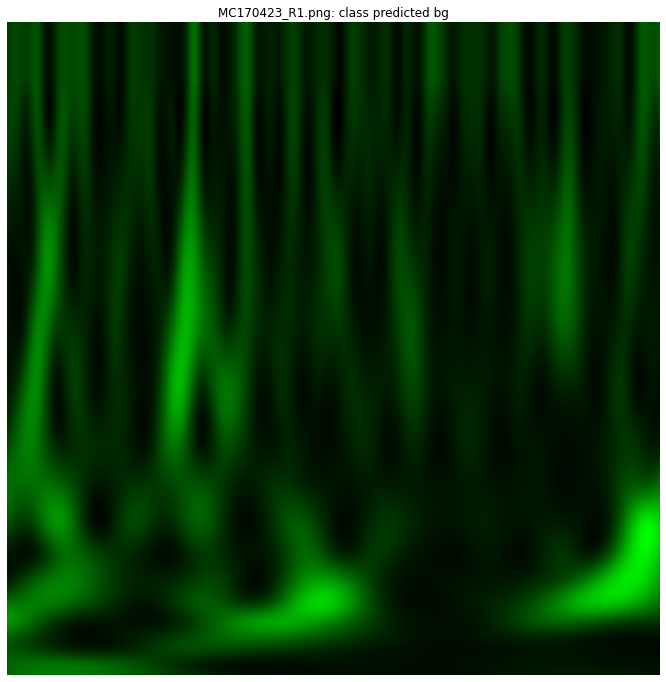

In [56]:
for i in real_files:
    pred, _, _ = learn.predict(i)
    if pred == 'bg':
        _,axs = subplots(1,1, figsize=(12,12))
        img = PILImage(PILImage.create(i))
        show_image(img,ctx=axs[0], title=f'{i.name}: class predicted {pred}')

# CNN Interpretation with CAM

### The class activation map (CAM) was introduced by Bolei Zhou et al. in "Learning Deep Features for Discriminative Localization". It uses the output of the last convolutional layer (just before the average pooling layer) together with the predictions to give us a heatmap visualization of why the model made its decision. This is a useful tool for interpretation.

### More precisely, at each position of our final convolutional layer, we have as many filters as in the last linear layer. We can therefore compute the dot product of those activations with the final weights to get, for each location on our feature map, the score of the feature that was used to make a decision.

In [58]:
del(data)
torch.cuda.empty_cache()

In [59]:
data = get_dls(64,128)

In [60]:
model = xresnet50(n_out=2)
learn = Learner(data, model, loss_func=CrossEntropyLossFlat(), metrics=[accuracy,error_rate])

In [61]:
learn.load('xresnet_50_final')

In [62]:
preds = learn.get_preds()

The class activation map (CAM) was introduced by Bolei Zhou et al. in "Learning Deep Features for Discriminative Localization". It uses the output of the last convolutional layer (just before the average pooling layer) together with the predictions to give us a heatmap visualization of why the model made its decision.

For CAM we want to store the activations of the last convolutional layer. We put our hook function in a class so it has a state that we can access later, and just store a copy of the output:

In [63]:
class Hook():
    def hook_func(self, m, i, o): self.stored = o.detach().clone()

We can then instantiate a Hook and attach it to the layer we want, which is the last layer of the CNN body:

In [64]:
hook_output = Hook()
hook = learn.model[0].register_forward_hook(hook_output.hook_func)

To start, we'll signal q-graph and create a batch from it:

In [65]:
img = PILImage.create(real_files[15])
x, = first(data.test_dl([img]))

In [66]:
x.shape

torch.Size([1, 3, 128, 128])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<AxesSubplot:>

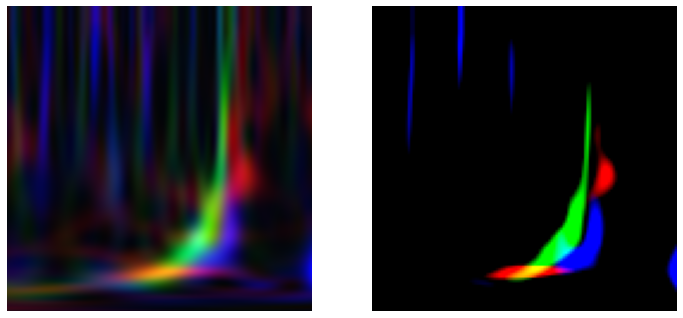

In [73]:
_, axs = subplots(1,2,figsize=(12,12))
show_image(img,ax=axs[0])
show_image(x[0],ax=axs[1])

### Now we can grab a batch and feed it through our model:

In [74]:
with torch.no_grad(): output = learn.model.eval()(x)

And we can access our stored activations:

In [75]:
act = hook_output.stored[0]

In [76]:
act.shape

torch.Size([32, 64, 64])

In [77]:
F.softmax(output, dim=-1)

tensor([[0.0357, 0.9643]], device='cuda:0')

In [78]:
data.vocab

(#2) ['bg','sig']

In [79]:
x.shape

torch.Size([1, 3, 128, 128])

In [80]:
cam_map = torch.einsum('ck,kij->cij',list(learn.model[-5][-1].children())[0][-1][0].weight.reshape(-1,32), act)
cam_map.shape

torch.Size([32768, 64, 64])

In [81]:
cam_map_mean = cam_map.mean(0)

In [82]:
x_dec = TensorImage(data.train.decode((x,))[0][0])

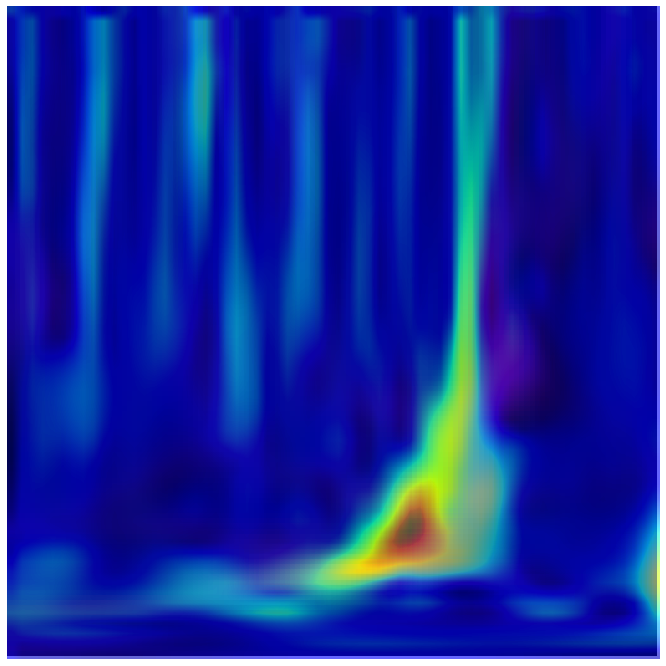

In [87]:
_,ax = plt.subplots(figsize=(12,12))
x_dec.show(ctx=ax)
ax.imshow(cam_map[0].detach().cpu(), alpha=0.6, extent=(0,128,128,0),
              interpolation='bilinear', cmap='jet');

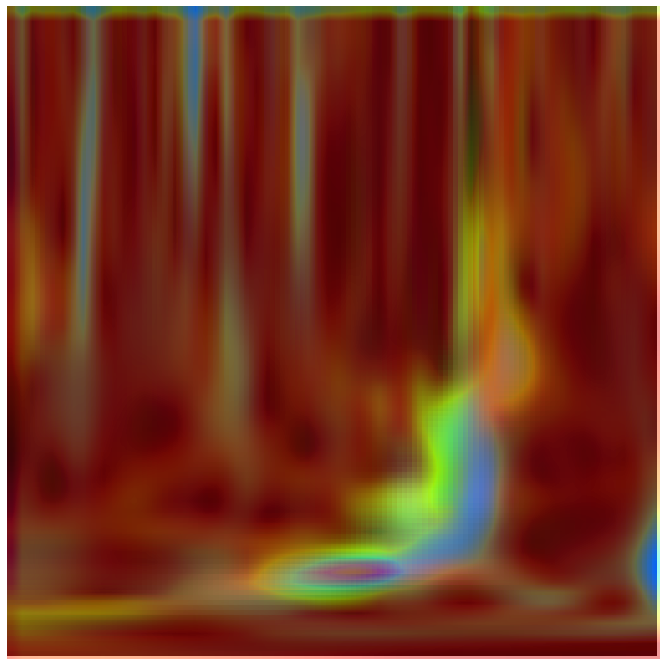

In [84]:
_,ax = plt.subplots(figsize=(12,12))
x_dec.show(ctx=ax)
ax.imshow(cam_map_mean.detach().cpu(), alpha=0.4, extent=(0,128,128,0),
              interpolation='bilinear', cmap='jet');

In [88]:
hook.remove()

# Gradient CAM

### The method we just saw only lets us compute a heatmap with the last activations, since once we have our features, we have to multiply them by the last weight matrix. This won't work for inner layers in the network. A variant introduced in the paper "Grad-CAM: Why Did You Say That? Visual Explanations from Deep Networks via Gradient-based Localization" in 2016 uses the gradients of the final activation for the desired class. 

### !!! The gradients of the output of the last layer with respect to the input of that layer are equal to the layer weights, since it is a linear layer.

### With deeper layers, we still want the gradients, but they won't just be equal to the weights anymore. We have to calculate them. The gradients of every layer are calculated for us by PyTorch during the backward pass, but they're not stored (except for tensors where requires_grad is True). We can, however, register a hook on the backward pass, which PyTorch will give the gradients to as a parameter, so we can store them there. For this we will use a HookBwd class that works like Hook, but intercepts and stores gradients instead of activations:

In [89]:
class Hook():
    def __init__(self, m):
        self.hook = m.register_forward_hook(self.hook_func)   
    def hook_func(self, m, i, o): self.stored = o.detach().clone()
    def __enter__(self, *args): return self
    def __exit__(self, *args): self.hook.remove()

### Then for the class index 1 we intercept the features of the last convolutional layer as before, and compute the gradients of the output activations of our class. We can't just call output.backward(), because gradients only make sense with respect to a scalar (which is normally our loss) and output is a rank-2 tensor. But if we pick a single image (we'll use 0) and a single class (we'll use 1), then we can calculate the gradients of any weight or activation we like, with respect to that single value, using output[0,cls].backward(). Our hook intercepts the gradients that we'll use as weights:

In [90]:
class HookBwd():
    def __init__(self, m):
        self.hook = m.register_backward_hook(self.hook_func)   
    def hook_func(self, m, gi, go): self.stored = go[0].detach().clone()
    def __enter__(self, *args): return self
    def __exit__(self, *args): self.hook.remove()

In [91]:
cls = 0
with HookBwd(learn.model[0]) as hookg:
    with Hook(learn.model[0]) as hook:
        output = learn.model.eval()(x.cuda())
        act = hook.stored
    output[0,cls].backward()
    grad = hookg.stored

In [92]:
w = grad[0].mean(dim=[1,2], keepdim=True)
cam_map = (w * act[0]).sum(0)

In [93]:
cam_map.shape

torch.Size([64, 64])

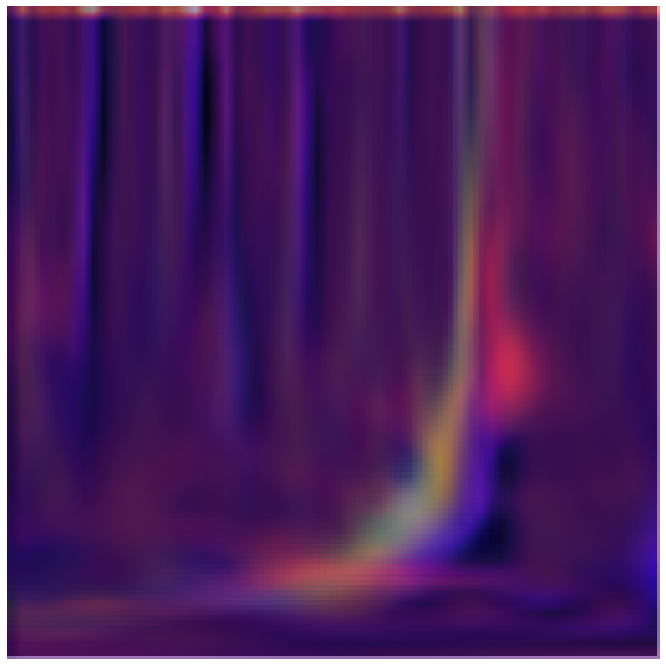

In [94]:
_,ax = plt.subplots(figsize=(12,12))
x_dec.show(ctx=ax)
ax.imshow(cam_map.detach().cpu(), alpha=0.6, extent=(0,128,128,0),
              interpolation='bilinear', cmap='magma');

### The novelty with Grad-CAM is that we can use it on any layer. For example, here we use it on the output of the second-to-last XResNet group:

In [95]:
with HookBwd(learn.model[-5][-1]) as hookg:
    with Hook(learn.model[-5][-1]) as hook:
        output = learn.model.eval()(x.cuda())
        act = hook.stored
    output[0,cls].backward()
    grad = hookg.stored

In [96]:
w = grad[0].mean(dim=[1,2], keepdim=True)
cam_map = (w * act[0]).sum(0)

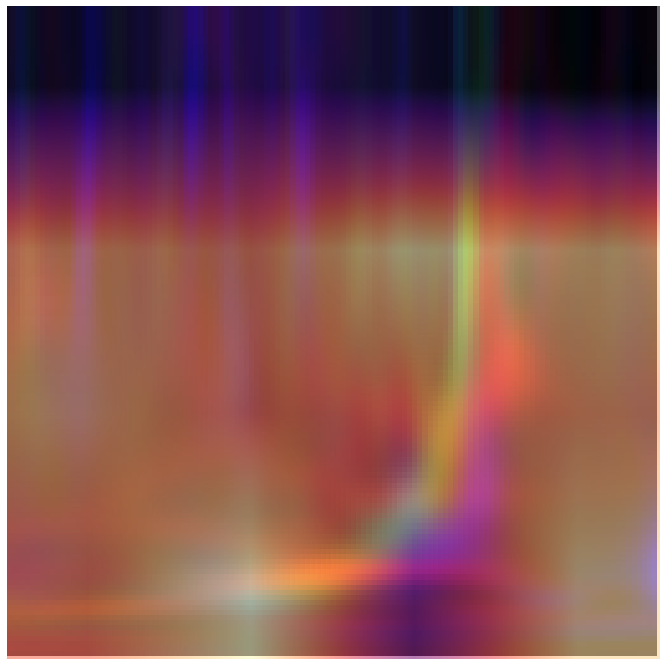

In [97]:
_,ax = plt.subplots(figsize=(12,12))
x_dec.show(ctx=ax)
ax.imshow(cam_map.detach().cpu(), alpha=0.6, extent=(0,128,128,0),
              interpolation='bilinear', cmap='magma');